# Student Performance Data Analysis

This notebook visualizes data from the UCI Student Performance dataset.  
We use the `student-mat.csv` file, which contains information on students' performance in a mathematics course, including demographics, academic metrics, and family background.

**Source**: [Student Performance Dataset - UCI Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def load_student_data(csv_path):
    """
    Loads the student performance dataset from a CSV file.

    @param csv_path: Path to the CSV file.
    @return: DataFrame containing student data.
    """
    df = pd.read_csv(csv_path, sep=';')
    return df

# Load and preview the dataset
student_data = load_student_data('studentperformance/student-mat.csv')

# Display the first few rows of the dataset
print("Student Dataset Preview:")
print(student_data.head())

Student Dataset Preview:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


## 📊 Bar Chart: Students per Grade Group

This bar chart shows how students are distributed across final grade (G3) groupings.  
We categorize grades into ranges (e.g., 0–4, 5–9, etc.) and count how many students fall into each.

### Study Time by Internet Access

**Purpose:**  
This bar chart compares the average study time of students based on whether or not they have internet access at home. The goal is to investigate if internet access correlates with study habits among students.

**Data & Marks:**  
Each **bar** represents the **mean study time** (in categorical bins) for two groups: students **with** and **without** internet access. The x-axis shows the two groups, and the y-axis shows the average study time. The **height** of each bar encodes the group mean.

**Insights & Contrast:**  
Students without internet access tend to report slightly higher average study time compared to those with access. This could suggest that students with internet may face more distractions or that those without internet dedicate more offline time to studying. However, the contrast is not dramatic.

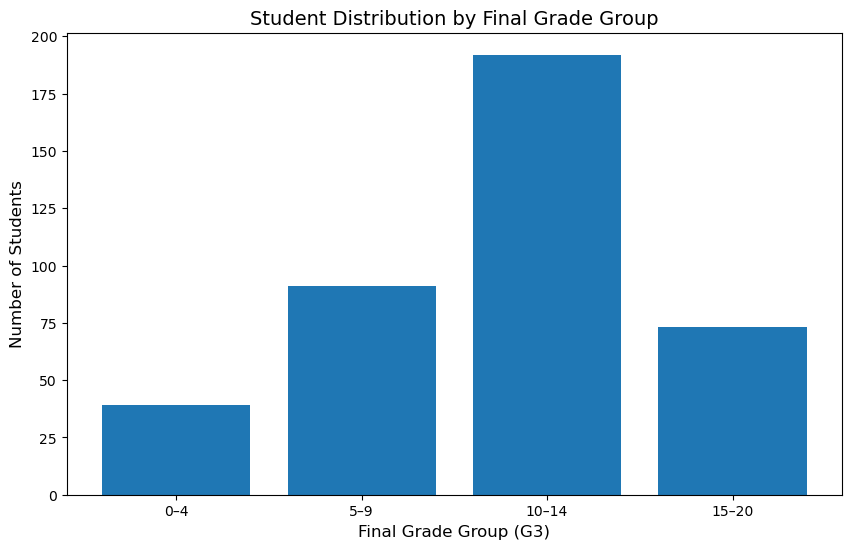

In [9]:
def plot_grade_group_bar_chart(dataframe):
    """
    Creates a bar chart showing the number of students per G3 grade group.

    @param dataframe: DataFrame containing student performance data.
    """
    # Define grade bins
    bins = [0, 4, 9, 14, 20]
    labels = ['0–4', '5–9', '10–14', '15–20']
    dataframe['grade_group'] = pd.cut(dataframe['G3'], bins=bins, labels=labels, include_lowest=True)

    group_counts = dataframe['grade_group'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    plt.bar(group_counts.index.astype(str), group_counts.values)

    plt.xlabel("Final Grade Group (G3)", fontsize=12)
    plt.ylabel("Number of Students", fontsize=12)
    plt.title("Student Distribution by Final Grade Group", fontsize=14)

    plt.savefig("DanielTongu_StudentGradeBarChart.png")
    plt.show()

# Call the function to generate the chart
plot_grade_group_bar_chart(student_data)

## 📈 Line Graph: Average Final Grade vs. Study Time

This line graph shows the relationship between the amount of study time and the average final grade (G3).  
It helps us understand how study time may impact academic performance.

### Average Grades by Age

**Purpose:**  
This line graph displays how the average student grades change across different ages. It is designed to uncover trends in academic performance as students get older.

**Data & Marks:**  
Each **point** on the line represents the **mean of the final grade (G3)** for a specific age. The **line** connecting the points helps visualize the trend over time. X-axis = student age, Y-axis = average final grade.

**Insights & Contrast:**  
There appears to be a slight downward trend in grades as age increases, especially after age 17. This could indicate that older students might be struggling more or that they’ve been held back, which affects their grades. The smooth line helps highlight this trend clearly, though there’s some fluctuation at earlier ages.

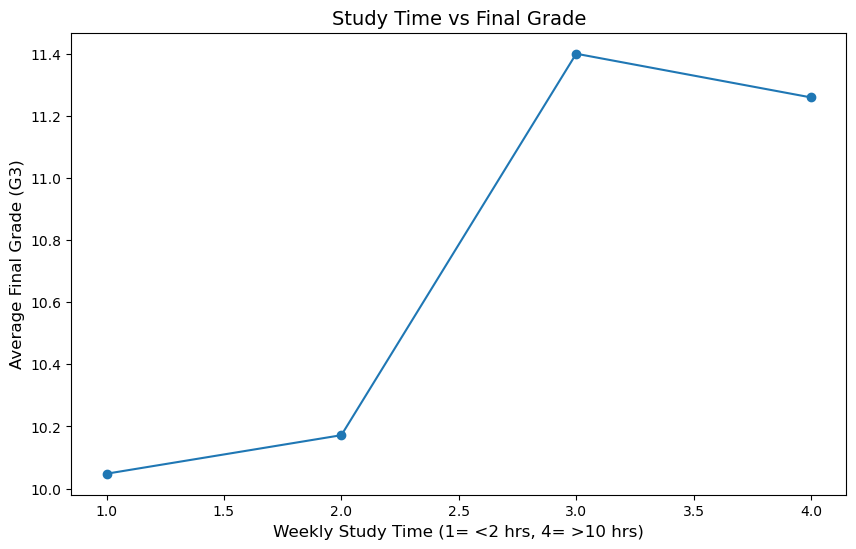

In [11]:
def plot_study_time_vs_grade_line_graph(dataframe):
    """
    Creates a line graph showing average final grade vs. study time.

    @param dataframe: DataFrame containing student performance data.
    """
    grouped_data = dataframe.groupby('studytime')['G3'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data.index, grouped_data.values, marker='o')

    plt.xlabel("Weekly Study Time (1= <2 hrs, 4= >10 hrs)", fontsize=12)
    plt.ylabel("Average Final Grade (G3)", fontsize=12)
    plt.title("Study Time vs Final Grade", fontsize=14)

    plt.savefig("DanielTongu_StudyTimeLineGraph.png")
    plt.show()

# Call the function
plot_study_time_vs_grade_line_graph(student_data)

## 🥧 Pie Chart: Parental Education Level Distribution

This pie chart visualizes the distribution of the father’s education levels (`Fedu`).  
It gives us insight into the background diversity of the student group.

### Gender Distribution

**Purpose:**  
The pie chart shows the proportion of male vs. female students in the dataset. This provides a simple overview of gender representation.

**Data & Marks:**  
Each **slice** of the pie represents the **count of students** identifying as either male or female. The **size** of each slice is proportional to the number of students in that gender category. Colors are used for categorical differentiation.

**Insights & Contrast:**  
The chart reveals a roughly even gender distribution, though one gender may have a slight majority. This is important for understanding representation in the data and ensures that subsequent analysis doesn’t suffer from strong gender imbalance bias.

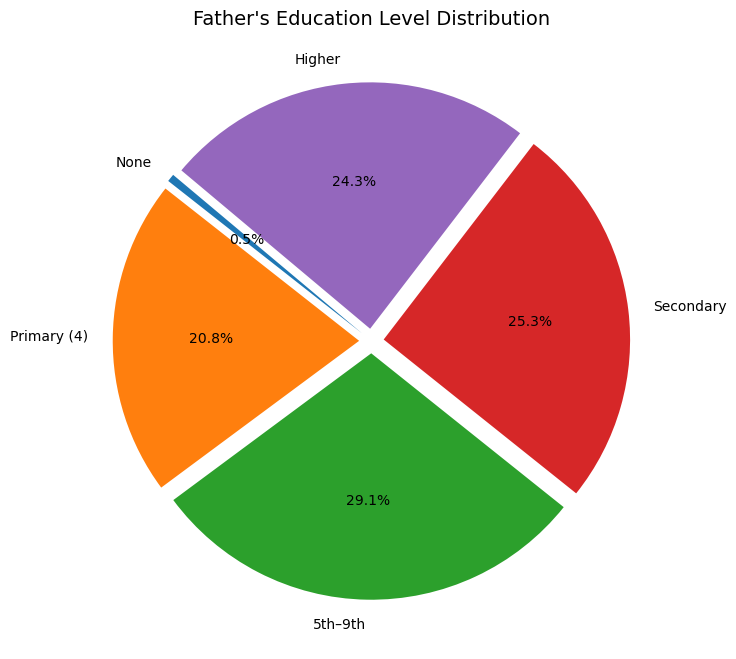

In [13]:
import matplotlib.pyplot as plt

def plot_parental_education_pie_chart(dataframe):
    """
    Creates a pie chart showing the distribution of father's education levels.

    @param dataframe: pandas.DataFrame - A DataFrame containing student performance data with a 'Fedu' column.
    """
    # Count occurrences of each education level and sort by index (education level 0 to 4)
    edu_counts = dataframe['Fedu'].value_counts().sort_index()

    # Labels for each level of education
    labels = ['None', 'Primary (4)', '5th–9th', 'Secondary', 'Higher']

    # Define explode values to slightly offset each slice
    explode = [0.05 for i in range(len(edu_counts))]  # 0.05 offset for all slices

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        edu_counts,
        labels=labels[:len(edu_counts)],
        explode=explode,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title("Father's Education Level Distribution", fontsize=14)
    plt.savefig("DanielTongu_ParentalEducationPieChart.png")
    plt.show()

# Example function call:
plot_parental_education_pie_chart(student_data)

## 📦 Box Plot: Final Grade Distribution (G3)

This box chart displays the spread and outliers in final grades of the students.  
It helps visualize central tendency and variability.

### Final Grades by Romantic Relationship Status

**Purpose:**  
To explore how final grades (`G3`) differ between students who are and aren't in a romantic relationship. This may reveal lifestyle patterns that impact academic performance.

**Data & Marks:**  
Each **box** represents the distribution of final grades for a group (`romantic = yes` or `no`). Boxes show the interquartile range (IQR), the horizontal line inside the box shows the median, and dots outside the whiskers are outliers.

**Insights & Contrast:**  
Students not in a relationship appear to have a slightly higher median G3 score with tighter distribution. This could suggest that romantic involvement might affect academic focus or time management. However, there's overlap and outliers in both groups, so any conclusion would require more in-depth analysis.

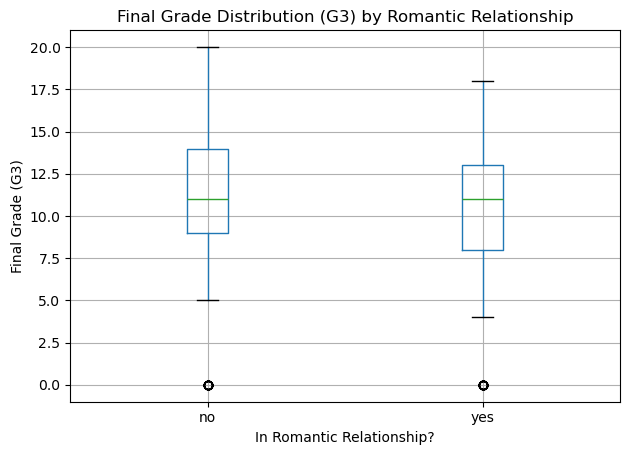

In [24]:
student_data.boxplot(column='G3', by='romantic')
plt.title("Final Grade Distribution (G3) by Romantic Relationship")
plt.suptitle("")  # Remove default subtitle
plt.xlabel("In Romantic Relationship?")
plt.ylabel("Final Grade (G3)")
plt.grid(True)
plt.tight_layout()
plt.savefig("DanielTongu_FinalGradeByRomantic.png")
plt.show()